# Step 2. Exploratory Data Analysis and Initial Feature Selection


verion 4.0 August 1 2018

1. Process ADAMS sub-sample
2. Process HRS 2000 data

## Introduction

First, we go from 6k to 2k filtering for data relevance and also completeness (lots of missing data in the 4k features). Next, we go from 2k to 100 using feature selection (testing for missing data, uniqueness, correlation, and feature importance). 

Next we add 100+ from theory. Accounting for overlaps we get about 250 features.

Note that a few features might change due to randomness (for feature importance) or because target is different i.e. whether we chose just ADAMS or full HRS => There is, however, a large number of features which are consistent. In general we prefer using full HRS.

In [33]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import scipy as sp

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

from feature_selector import FeatureSelector

LOCAL_DIR = '/home/jovyan/notebook/'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## A. ADAMS Sub-Sample
### Loading Data

In [34]:
# Load data 
table_2000 = pd.read_csv(LOCAL_DIR + 'braindata/process_hrs2000.csv')
table_adams = pd.read_csv(LOCAL_DIR + 'brainFitDx/data/sample/model_data_adams.csv')

In [35]:
table_2000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19579 entries, 0 to 19578
Columns: 2612 entries, hhidpn to brain_health_3
dtypes: float64(2458), int64(154)
memory usage: 390.2 MB


In [36]:
table_adams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856 entries, 0 to 855
Columns: 235 entries, hhidpn to g3060
dtypes: float64(34), int64(201)
memory usage: 1.5 MB


In [37]:
table_adams['adams'] = 1

In [38]:
# Just keep diagnosis
table_adams = table_adams.loc[:,['hhidpn', 'adams','brain_health_diag2']]

In [39]:
# Merge and add in ADAMS diagnosis
df = pd.merge(table_2000,table_adams, how='left', on='hhidpn', suffixes=('', '_y'))

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19579 entries, 0 to 19578
Columns: 2614 entries, hhidpn to brain_health_diag2
dtypes: float64(2460), int64(154)
memory usage: 390.6 MB


In [41]:
dfs = df.loc[df['adams']==1, :]
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 846 entries, 13 to 19574
Columns: 2614 entries, hhidpn to brain_health_diag2
dtypes: float64(2460), int64(154)
memory usage: 16.9 MB


### Examine Data - Target ADAMS Diagnosis

In [42]:
target = dfs['brain_health_diag2']
dfs = dfs.drop(columns=['brain_health_diag2', 'adams', 'hhidpn'])

In [43]:
fs = FeatureSelector(data = dfs, labels = target)

Missing values

In [44]:
fs.identify_missing(missing_threshold=0.6)

2168 features with greater than 0.60 missing values.



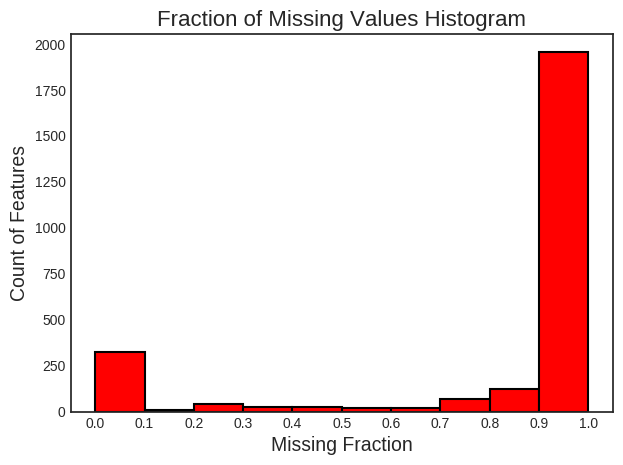

In [45]:
fs.plot_missing()

Single value

In [46]:
fs.identify_single_unique()

322 features with a single unique value.



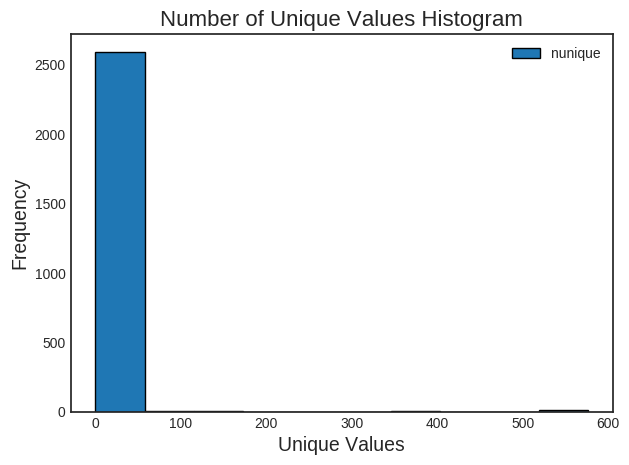

In [47]:
fs.plot_unique()

In [48]:
fs.ops['single_unique']

['g1060',
 'g1061m',
 'g1075',
 'g1076',
 'g1077m',
 'g1089',
 'g1095',
 'g1098',
 'g1116',
 'g1122m',
 'g1139',
 'g1145',
 'g1159',
 'g1221',
 'g1297',
 'g1336m2',
 'g1336m3',
 'g1404',
 'g1411',
 'g1421',
 'g1422',
 'g1423',
 'g1424',
 'g1428',
 'g1456',
 'g1478',
 'g1668m2',
 'g1815m11',
 'g2505',
 'g2601',
 'g2618',
 'g2643',
 'g2644',
 'g2656m3',
 'g2656m4',
 'g2656m5',
 'g2659m3',
 'g2721_1',
 'g2721_2',
 'g2721_3',
 'g2721_4',
 'g2721_5',
 'g2721_6',
 'g2721_7',
 'g2721_8',
 'g2721_9',
 'g2721_10',
 'g2727m4',
 'g2766m3',
 'g2835',
 'g2836',
 'g2838',
 'g2913',
 'g2994m6',
 'g3003m4',
 'g3004m7',
 'g3004m8',
 'g3004m9',
 'g3004m10',
 'g3005m2',
 'g3365m3',
 'g3393',
 'g3394',
 'g3427',
 'g3429m13',
 'g3429m14',
 'g3429m15',
 'g3429m16',
 'g3429m17',
 'g3429m18',
 'g3429m19',
 'g3429m20',
 'g3429m21',
 'g3429m22',
 'g3429m23',
 'g3429m24',
 'g3429m25',
 'g3444m3',
 'g3446m2',
 'g3454_1',
 'g3454_2',
 'g3455_2',
 'g3468_1',
 'g3475_1',
 'g3476_1',
 'g3478_1',
 'g3483_1',
 'g3483_2

Correlated features

In [49]:
fs.identify_collinear(correlation_threshold=0.975)

1313 features with a correlation magnitude greater than 0.97.



In [50]:
correlated_features = fs.ops['collinear']
correlated_features[:60]

['g1051a',
 'g1053a',
 'g1074',
 'g1074a',
 'g1084m',
 'g1087',
 'g1088',
 'g1092m',
 'g1092a',
 'g1093',
 'g1094',
 'g1096',
 'g1097',
 'g1101',
 'g1102',
 'g1109m3',
 'g1118',
 'g1119',
 'g1125',
 'g1140m',
 'g1148',
 'g1154',
 'g1155',
 'g1157',
 'g1158',
 'g1160',
 'g1161',
 'g1162',
 'g1163',
 'g1172',
 'g1173',
 'g1176',
 'g1226',
 'g1229',
 'g1233',
 'g1238',
 'g1240',
 'g1248',
 'g1249',
 'g1251',
 'g1255',
 'g1265m1',
 'g1265m3',
 'g1274',
 'g1275',
 'g1279',
 'g1284',
 'g1289',
 'g1291',
 'g1292',
 'g1295',
 'g1299',
 'g1301',
 'g1302',
 'g1303',
 'g1305',
 'g1306',
 'g1309',
 'g1311',
 'g1312']

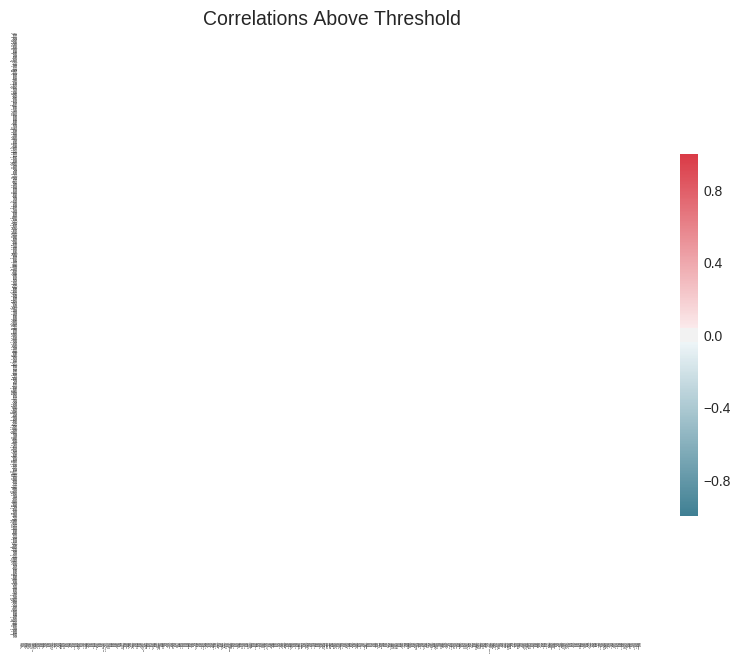

In [51]:
fs.plot_collinear()

Feature importance (gradient boosting)

In [52]:
fs.identify_zero_importance(task = 'classification', eval_metric = 'auc', 
                            n_iterations = 10, early_stopping = True)

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[59]	valid_0's auc: 0.931092
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[66]	valid_0's auc: 0.922857
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[62]	valid_0's auc: 0.873581
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[114]	valid_0's auc: 0.910027
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[128]	valid_0's auc: 0.856623
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[248]	valid_0's auc: 0.871809
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[75]	valid_0's auc: 0.914905
Training until validation scores don't improve for 100 rounds.
Early stopp

In [53]:
one_hot_features = fs.one_hot_features
base_features = fs.base_features
print('There are %d original features' % len(base_features))
print('There are %d one-hot features' % len(one_hot_features))

There are 2611 original features
There are 0 one-hot features


In [54]:
zero_importance_features = fs.ops['zero_importance']
zero_importance_features[10:15]

['g1979m14', 'g1947m7', 'g3685b1', 'g1612', 'g3895_2']

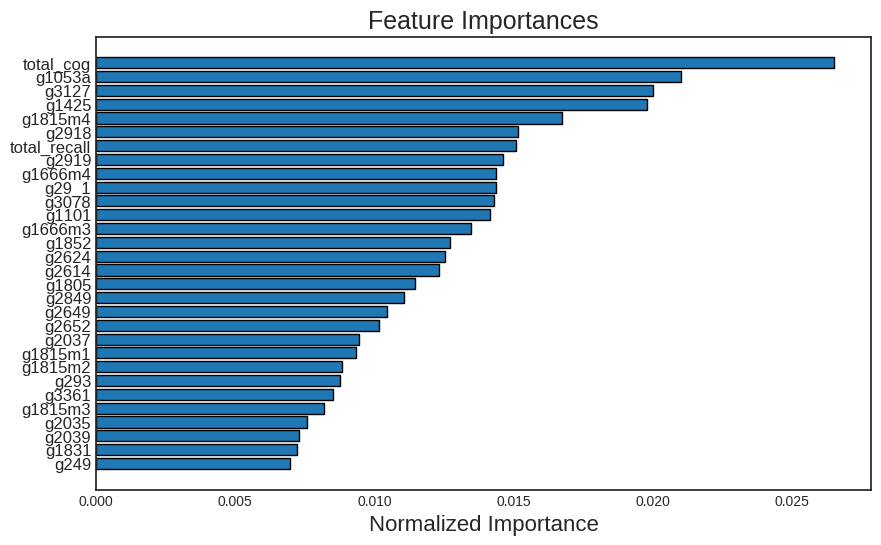

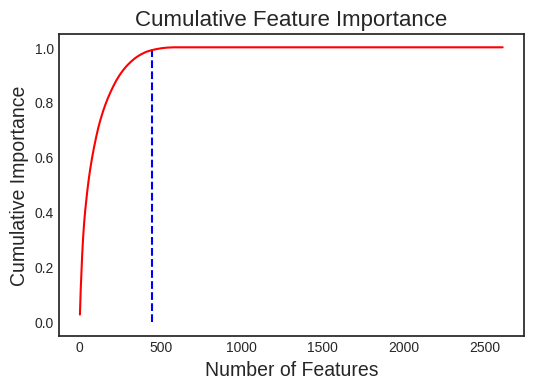

448 features required for 0.99 of cumulative importance


In [55]:
fs.plot_feature_importances(threshold = 0.99, plot_n = 30)

Low importance features

In [56]:
fs.identify_low_importance(cumulative_importance = 0.99)

447 features required for cumulative importance of 0.99 after one hot encoding.
2164 features do not contribute to cumulative importance of 0.99.



In [57]:
train_removed_all = fs.remove(methods = 'all', keep_one_hot=False)

['missing', 'single_unique', 'collinear', 'zero_importance', 'low_importance'] methods have been run

Removed 2576 features including one-hot features.


In [58]:
train_removed_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 846 entries, 13 to 19574
Data columns (total 35 columns):
g1085      846 non-null int64
g1089a     846 non-null float64
g1142      846 non-null int64
g1146      442 non-null float64
g1153      442 non-null float64
g1239      469 non-null float64
g1241      469 non-null float64
g1242      425 non-null float64
g1245      846 non-null int64
g1326      783 non-null float64
g1328      512 non-null float64
g1332      572 non-null float64
g1367      817 non-null float64
g1372      846 non-null int64
g1395      846 non-null int64
g1415      846 non-null int64
g1437      846 non-null int64
g1438      846 non-null int64
g1440      846 non-null int64
g1442      846 non-null int64
g1655      663 non-null float64
g1668m1    652 non-null float64
g1671      663 non-null float64
g1672      662 non-null float64
g1673      663 non-null float64
g1675      663 non-null float64
g1677      663 non-null float64
g1769      644 non-null float64
g1826      663 n

### Feature Selector in One Step

In [59]:
fs = FeatureSelector(data = dfs, labels = target)

fs.identify_all(selection_params = {'missing_threshold': 0.6, 'correlation_threshold': 0.98, 
                                    'task': 'classification', 'eval_metric': 'auc', 
                                     'cumulative_importance': 0.99})

2168 features with greater than 0.60 missing values.

322 features with a single unique value.

1313 features with a correlation magnitude greater than 0.98.

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[32]	valid_0's auc: 0.887356
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[284]	valid_0's auc: 0.867663
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[17]	valid_0's auc: 0.937295
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[296]	valid_0's auc: 0.887658
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[61]	valid_0's auc: 0.931631
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[43]	valid_0's auc: 0.909554
Training until validation scores don't impr

In [60]:
train_removed_all_once = fs.remove(methods = 'all', keep_one_hot = True)

['missing', 'single_unique', 'collinear', 'zero_importance', 'low_importance'] methods have been run

Removed 2572 features.


In [61]:
fs.feature_importances.head()

,feature,importance,normalized_importance,cumulative_importance
0,total_cog,83.2,0.022554,0.022554
1,g1425,82.0,0.022229,0.044783
2,g3127,76.2,0.020657,0.065440
3,g1053a,70.9,0.019220,0.084659
4,g1815m4,65.3,0.017702,0.102361


### PCA - Number of Dims

In [62]:
dfs = df.loc[df['adams']==1, :]

In [63]:
# Define X, y
X = dfs.drop(columns=['hhidpn','brain_health_diag2','adams'])
y = dfs['brain_health_diag2']

In [64]:
X.fillna(value=0, inplace=True)

In [65]:
pca = PCA(n_components=100)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Text(0,0.5,'explained_variance_')

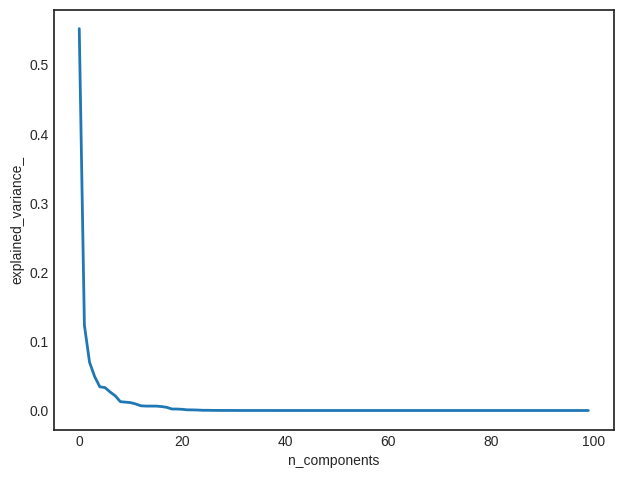

In [66]:
plt.figure(1, figsize=(8, 6))
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

### And Using SelectK Best

In [35]:
selectk = SelectKBest(mutual_info_classif,k=100)
selectk.fit(X,y)

SelectKBest(k=100,
      score_func=<function mutual_info_classif at 0x7f0872324d90>)

In [36]:
mask = selectk.get_support().tolist()

In [37]:
X.loc[:,mask].keys()

Index(['g1053a', 'g1101', 'g1655', 'g1661', 'g1666m1', 'g1666m2', 'g1666m3',
       'g1666m4', 'g1666m5', 'g1666m6', 'g1669', 'g1672', 'g1674', 'g1675',
       'g1676', 'g1677', 'g1710', 'g1769', 'g1805', 'g1806', 'g1807', 'g1808',
       'g1809', 'g1810', 'g1814', 'g1815m1', 'g1815m2', 'g1815m3', 'g1815m4',
       'g1815m5', 'g1821', 'g1822', 'g1823', 'g1825', 'g1826', 'g1827',
       'g1831', 'g1833', 'g1836', 'g1839', 'g1842', 'g1845', 'g1852', 'g1857',
       'g2614', 'g2692', 'g2716', 'g2726', 'g2742', 'g2800', 'g2808', 'g2847',
       'g2848', 'g2849', 'g2851', 'g2860', 'g2862', 'g2865', 'g2915', 'g2916',
       'g2918', 'g2919', 'g2922', 'g2939m1', 'g2940', 'g3002', 'g3365m1',
       'g3750_3', 'g29_1', 'g166_2', 'g166_3', 'g1532', 'g1537', 'g1543',
       'g1545', 'g1550', 'g1558', 'g1563', 'g1578', 'g1583', 'g1588', 'g1593',
       'g1598', 'g1600', 'g1602', 'g1605', 'g1615', 'g1618', 'g1621', 'g1622',
       'backwards_20', 'serial7', 'immediate_recall', 'delayed_recall',
   

In [38]:
scalar = StandardScaler()
X2 = scalar.fit_transform(X)
selectk.fit(X2,y)
mask = selectk.get_support().tolist()
X.loc[:,mask].keys()

Index(['g1053a', 'g1101', 'g1326', 'g1654', 'g1661', 'g1666m1', 'g1666m2',
       'g1666m3', 'g1666m4', 'g1666m5', 'g1666m6', 'g1668m1', 'g1669', 'g1670',
       'g1673', 'g1674', 'g1675', 'g1677', 'g1710', 'g1769', 'g1805', 'g1806',
       'g1807', 'g1808', 'g1809', 'g1810', 'g1814', 'g1815m1', 'g1815m2',
       'g1815m3', 'g1815m4', 'g1815m5', 'g1815m6', 'g1820', 'g1821', 'g1822',
       'g1823', 'g1824', 'g1825', 'g1826', 'g1827', 'g1831', 'g1833', 'g1836',
       'g1839', 'g1842', 'g1845', 'g1852', 'g1857', 'g2689', 'g2692', 'g2704',
       'g2745', 'g2762', 'g2800', 'g2847', 'g2848', 'g2849', 'g2851', 'g2865',
       'g2883', 'g2916', 'g2918', 'g2919', 'g2922', 'g2939m1', 'g2939m2',
       'g2940', 'g3002', 'g3635_4', 'g1527', 'g1537', 'g1543', 'g1548',
       'g1555', 'g1573', 'g1583', 'g1588', 'g1602', 'g1605', 'g1607', 'g1608',
       'g1615', 'g1616', 'g1618', 'g1621', 'g1624', 'g3078', 'g3230', 'g3333',
       'backwards_20', 'serial7', 'immediate_recall', 'delayed_recall',
 

## B. HRS Sample
### Loading Data

In [67]:
target = df['brain_health_3']
data = df.drop(columns=['brain_health_3', 'hhidpn'])


In [68]:
fs = FeatureSelector(data = data, labels = target)

Missing values

In [69]:
fs.identify_missing(missing_threshold=0.6)

2178 features with greater than 0.60 missing values.



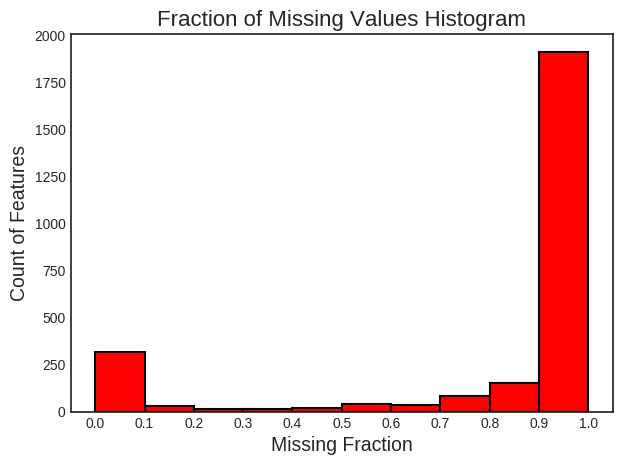

In [70]:
fs.plot_missing()

Single value

In [71]:
fs.identify_single_unique()

223 features with a single unique value.



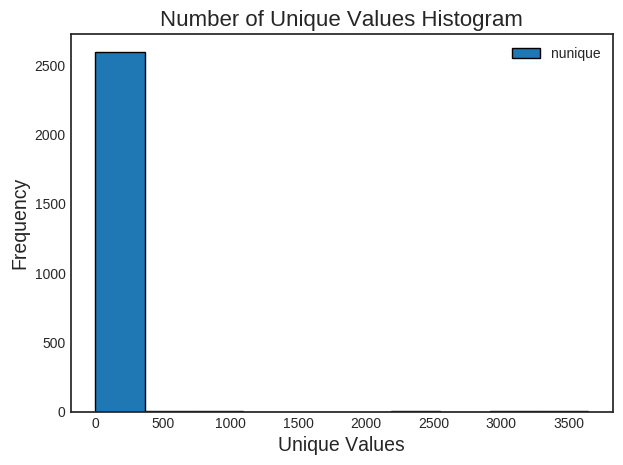

In [72]:
fs.plot_unique()

In [73]:
fs.ops['single_unique']

['g1063m',
 'g1065',
 'g1066',
 'g1109m5',
 'g1168',
 'g1169',
 'g1170',
 'g1171',
 'g1174',
 'g1221',
 'g1405',
 'g1468',
 'g1472',
 'g1486',
 'g1489',
 'g1666m11',
 'g2656m5',
 'g2659m4',
 'g2721_1',
 'g2721_2',
 'g2721_3',
 'g2721_4',
 'g2721_5',
 'g2721_6',
 'g2721_7',
 'g2721_8',
 'g2721_9',
 'g2721_10',
 'g2840',
 'g2939m9',
 'g3005m5',
 'g3391m13',
 'g3391m14',
 'g3391m15',
 'g3391m16',
 'g3391m17',
 'g3391m18',
 'g3427',
 'g3429m23',
 'g3429m24',
 'g3429m25',
 'g3444m4',
 'g3446m3',
 'g3450m15',
 'g3454_1',
 'g3454_2',
 'g3454_3',
 'g3454_4',
 'g3455_4',
 'g3459_2',
 'g3460_2',
 'g3461_2',
 'g3463008',
 'g3465_3',
 'g3468_3',
 'g3470_3',
 'g3472008',
 'g3475_3',
 'g3476_3',
 'g3478_3',
 'g3482_4',
 'g3483_4',
 'g3484_3',
 'g3484_4',
 'g3487_4',
 'g3491_2',
 'g3612m25',
 'g3612m26',
 'g3612m27',
 'g3612m28',
 'g3623_1',
 'g3623_2',
 'g3623_3',
 'g3623_4',
 'g3624_4',
 'g3625_2',
 'g3626_1',
 'g3626_2',
 'g3627_2',
 'g3628_2',
 'g3631_3',
 'g3639_3',
 'g3640_3',
 'g3645_3',
 'g36

Correlated features

In [74]:
fs.identify_collinear(correlation_threshold=0.975)

2038 features with a correlation magnitude greater than 0.97.



In [75]:
correlated_features = fs.ops['collinear']
correlated_features[:60]

['g1069',
 'g1073',
 'g1074a',
 'g1079',
 'g1084m',
 'g1087',
 'g1089',
 'g1089a',
 'g1092a',
 'g1093',
 'g1094',
 'g1101',
 'g1102',
 'g1109m1',
 'g1117',
 'g1118',
 'g1122m',
 'g1139',
 'g1142',
 'g1159',
 'g1160',
 'g1161',
 'g1164',
 'g1165',
 'g1166',
 'g1167',
 'g1226',
 'g1240',
 'g1242',
 'g1245',
 'g1248',
 'g1249',
 'g1250',
 'g1251',
 'g1255',
 'g1256',
 'g1263',
 'g1264',
 'g1265m1',
 'g1265m2',
 'g1265m3',
 'g1265m4',
 'g1268',
 'g1273',
 'g1274',
 'g1280',
 'g1284',
 'g1286',
 'g1287',
 'g1291',
 'g1298',
 'g1299',
 'g1300',
 'g1301',
 'g1302',
 'g1305',
 'g1307',
 'g1309',
 'g1313',
 'g1314']

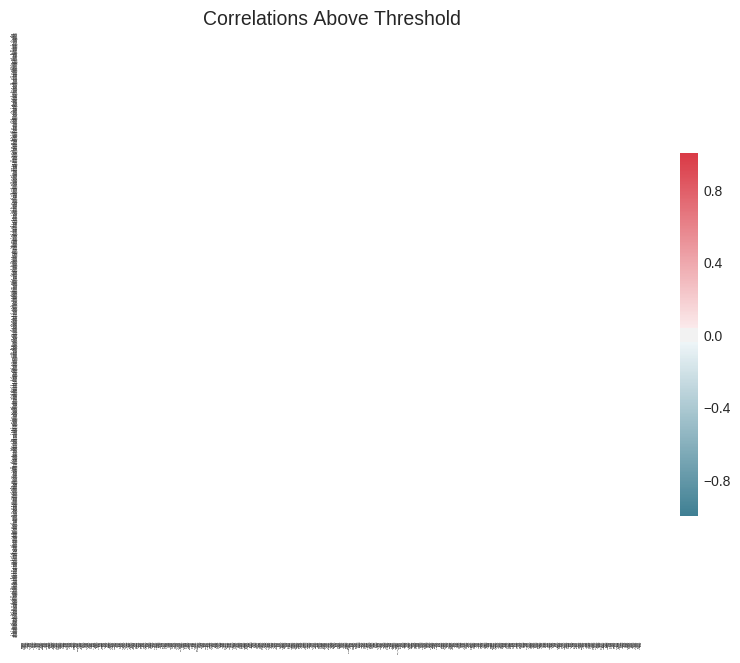

In [76]:
fs.plot_collinear()

Feature importance (gradient boosting)

In [77]:
fs.identify_zero_importance(task = 'classification', eval_metric = 'auc', 
                            n_iterations = 10, early_stopping = True)

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 1
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 1
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 1
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 1
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 1
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 1
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 1
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 1
Training until

In [78]:
one_hot_features = fs.one_hot_features
base_features = fs.base_features
print('There are %d original features' % len(base_features))
print('There are %d one-hot features' % len(one_hot_features))

There are 2612 original features
There are 0 one-hot features


In [79]:
zero_importance_features = fs.ops['zero_importance']
zero_importance_features[10:15]

['g293', 'g294', 'g295_1', 'g295_2', 'g296_1']

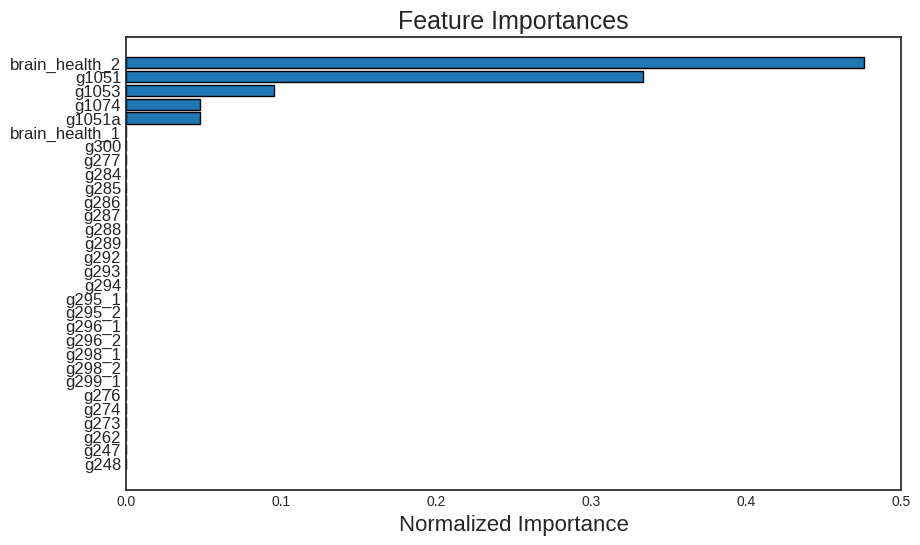

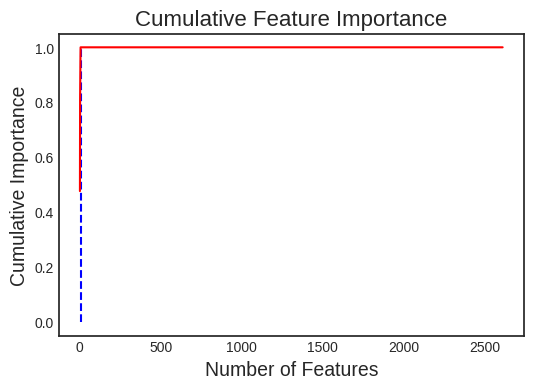

5 features required for 0.99 of cumulative importance


In [80]:
fs.plot_feature_importances(threshold = 0.99, plot_n = 30)

Low importance features

In [81]:
fs.identify_low_importance(cumulative_importance = 0.99)

4 features required for cumulative importance of 0.99 after one hot encoding.
2608 features do not contribute to cumulative importance of 0.99.



In [82]:
train_removed_all = fs.remove(methods = 'all', keep_one_hot=False)

['missing', 'single_unique', 'collinear', 'zero_importance', 'low_importance'] methods have been run

Removed 2612 features including one-hot features.


In [83]:
train_removed_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19579 entries, 0 to 19578
Empty DataFrame

### One Step

In [56]:
fs = FeatureSelector(data = data, labels = target)

fs.identify_all(selection_params = {'missing_threshold': 0.6, 'correlation_threshold': 0.98, 
                                    'task': 'classification', 'eval_metric': 'auc', 
                                     'cumulative_importance': 0.99})

2178 features with greater than 0.60 missing values.

223 features with a single unique value.

2038 features with a correlation magnitude greater than 0.98.

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 1
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 1
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 1
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 1
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 1
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 1
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration

In [57]:
train_removed_all_once = fs.remove(methods = 'all', keep_one_hot = True)

['missing', 'single_unique', 'collinear', 'zero_importance', 'low_importance'] methods have been run

Removed 2612 features.


In [58]:
fs.feature_importances.head()

,feature,importance,normalized_importance,cumulative_importance
0,brain_health_2,1.0,0.454545,0.454545
1,g1051,0.9,0.409091,0.863636
1737,g1076,0.0,0.000000,1.000000
1738,g1065,0.0,0.000000,1.000000
1739,g1053a,0.0,0.000000,1.000000


### Conclusion

No surprise but for full HRS, and lable 3, we get the linear combination of features which comprise lable 3.
